In [1]:
!pip install cvlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 60.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for cvlib: filename=cvlib-0.2.7-py3-none-any.whl size=10046382 sha256=e5253e1b1603e2d9d140e7c9f734dd67e738587592e25c46ee8af4d6a77974a0
  Stored in directory: /root/.cache/pip/wheels/96/ad/4c/d80d4bf4143c154ab297e2384915c89aff43d77d1787b9a702
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12080 sha256=aee1be60e328061701447b1a273a07a214e97f27997f0a0310a310375979fffe
  Stored in directory: /root/.cache/pip/wheels/d7/d9/89/a3f31c76ff6d51dc3b1575628f59afe59e4ceae3f2748cd7ad
Successfully built cvlib progressbar


In [22]:
import os
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
import tensorflow_datasets as tfds
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Add, BatchNormalization
from keras.models import load_model

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
batch_size = 32
img_height = 80
img_width = 50

In [8]:
dataset_path = '/content/drive/MyDrive/ZB/DL_project_2/temp_data/Training'

train_x = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size,
    color_mode = 'grayscale'
)

Found 84914 files belonging to 5 classes.
Using 67932 files for training.


In [9]:
val_x = tf.keras.utils.image_dataset_from_directory(
    dataset_path,validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size,
    color_mode = 'grayscale'
)

Found 84914 files belonging to 5 classes.
Using 16982 files for validation.


In [10]:
os.chdir('/content/drive/MyDrive/ZB/DL_project_2')

In [23]:
model3 = load_model('Resnet_with_batch_normalization_in_every_layer.h5')

In [ ]:
y_true = []
y_pred = []

for x,y in val_x:
    y_true.extend(y)
    temp = model3.predict(x)
    temp = [np.argmax(tmp) for tmp in temp]
    y_pred.extend(temp)

In [19]:
y_true = np.array(y_true)
y_pred = np.array(y_pred)
print(y_true[:5])
print(y_pred[:5])
print(len(y_true))
print(len(y_pred))

[0 2 2 2 0]
[0 1 1 2 0]
16982
16982


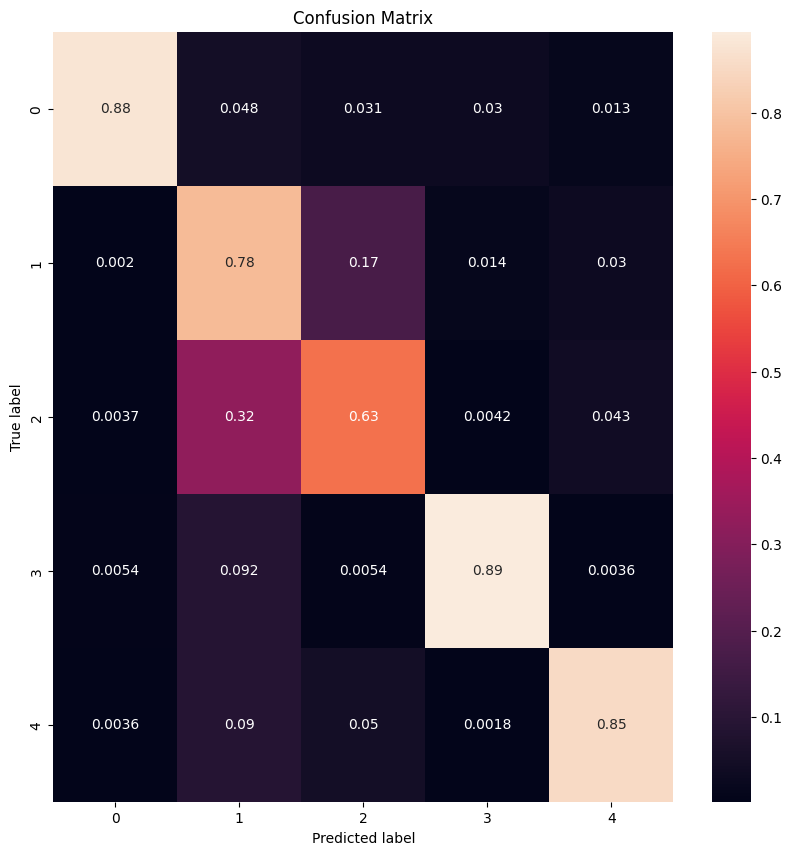

In [20]:
cm = confusion_matrix(y_true, y_pred, normalize='true')

fig = plt.figure(figsize = (10,10))
ax = sns.heatmap(cm, annot=True)
ax.set(title = 'Confusion Matrix',
            ylabel='True label',
            xlabel='Predicted label')
fig.savefig("confusion_matrix_for_resnet_with_batch_normalization")